<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/06_03_simple_nn_hand_calculation_with_pythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 0.4122
Epoch 10: Loss = 0.0143
Epoch 20: Loss = 0.0000
Epoch 30: Loss = 0.0000
Epoch 40: Loss = 0.0000
Epoch 50: Loss = 0.0000
Epoch 60: Loss = 0.0000
Epoch 70: Loss = 0.0000
Epoch 80: Loss = 0.0000
Epoch 90: Loss = 0.0000
\nFinal prediction: [[1.0000000e+00 1.5406795e-24]]
Gradients:
dL/dW2: tensor([[-0.5821,  1.1045],
        [-0.1129,  0.2125],
        [-0.3797,  0.7194]])
dL/db2: tensor([[-0.6274,  1.1907]])
dL/dW1: tensor([[-0.0017,  0.0522, -0.0541],
        [-0.0027,  0.0836, -0.0866]])
dL/db1: tensor([[-0.0034,  0.1045, -0.1082]])
Weights
W2: tensor([[ 11.5153, -20.6645],
        [  2.9933,  -2.9739],
        [  5.6449, -14.7938]], requires_grad=True)
b2: tensor([[ 13.0812, -21.5305]], requires_grad=True)
W1: tensor([[ 0.3605, -0.8733,  1.2355],
        [ 0.2685, -2.7262,  1.4153]], requires_grad=True)
b1: tensor([[ 2.2559, -2.6422,  2.4637]], requires_grad=True)
Final prediction: [[1.0000000e+00 1.5406795e-24]]


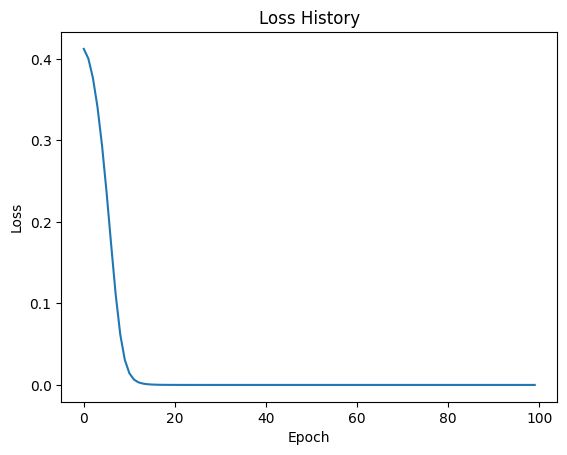

In [31]:
# Neural Network from Scratch in PyTorch
# 2-input, 3-hidden, 2-output neurons

import torch

# Set seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
input_size = 2
hidden_size = 3
output_size = 2
lr = 0.2
epochs = 100

# Sample training data (1 sample)
x = torch.tensor([[0.5, 0.8]], dtype=torch.float32)
y_true = torch.tensor([[1.0, 0.0]], dtype=torch.float32)

# Initialize weights and biases
W1 = torch.randn((input_size, hidden_size), requires_grad=True)
b1 = torch.randn((1, hidden_size), requires_grad=True)
W2 = torch.randn((hidden_size, output_size), requires_grad=True)
b2 = torch.randn((1, output_size), requires_grad=True)

# Training loop
loss_history = []
for epoch in range(epochs):
    # Forward pass
    z1 = x @ W1 + b1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = torch.sigmoid(z2)

    # Mean squared error loss
    loss = torch.mean((y_true - y_pred) ** 2)
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Gradient descent step
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Zero the gradients
        #W1.grad.zero_()
        #b1.grad.zero_()
        #W2.grad.zero_()
        #b2.grad.zero_()

    # Print loss every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Final prediction
print("\\nFinal prediction:", y_pred.detach().numpy())


# Print gradients for verification
print("Gradients:")
print("dL/dW2:", W2.grad)
print("dL/db2:", b2.grad)
print("dL/dW1:", W1.grad)
print("dL/db1:", b1.grad)

# Print weights
print("Weights")
print("W2:", W2)
print("b2:", b2)
print("W1:", W1)
print("b1:", b1)

# Final prediction
print("Final prediction:", y_pred.detach().numpy())

# Plot loss history
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()

